#                           NATURAL LANGUAGE PROCESSING

<img src="nlp.png",width=800,height=200>

# Part 1: Finding the Most Common Words

Import the necessary packages and functions

In [1]:
import re,nltk
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords


In [2]:
thesis = open('thesis.txt')
thesis = thesis.read() 

## Text Processing Step 1:
### Convert text to lowercase

In [3]:
thesis = thesis.lower()

## Text Processing Step 2:
### Get only alphanumeric characters from text
Use Regular Expression to get only Alphanumeric Characters from Text

In [4]:
thesis = re.sub( "[^a-zA-Z]", " ", thesis )

## Text Processing Step 3:
### Tokenize the text

In [5]:
thesis = nltk.tokenize.word_tokenize(thesis)

In [6]:
top=(Counter(thesis).most_common(10))
print(top)

[('the', 3822), ('of', 2338), ('is', 1169), ('to', 1137), ('in', 1097), ('a', 1081), ('and', 1039), ('for', 758), ('resource', 562), ('tasks', 452)]


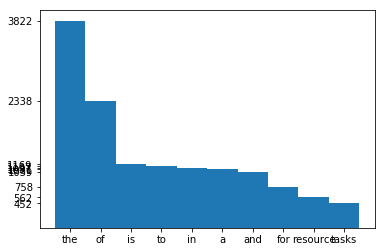

In [7]:
labels, ys = zip(*top)
xs = np.arange(len(labels)) 
width = 1

plt.bar(xs, ys, width, align='center')
plt.xticks(xs, labels) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(ys)
plt.show()

## Text Processing Step 4:
### Stop Word Removal

In [8]:
stopwords.words("english")
thesis = [w for w in thesis if w not in stopwords.words('english')]
top= Counter(thesis).most_common(10) 
print(top)
top


[('resource', 562), ('tasks', 452), ('data', 424), ('nodes', 374), ('fig', 343), ('resources', 337), ('task', 335), ('algorithm', 334), ('grid', 318), ('trps', 285)]


[('resource', 562),
 ('tasks', 452),
 ('data', 424),
 ('nodes', 374),
 ('fig', 343),
 ('resources', 337),
 ('task', 335),
 ('algorithm', 334),
 ('grid', 318),
 ('trps', 285)]

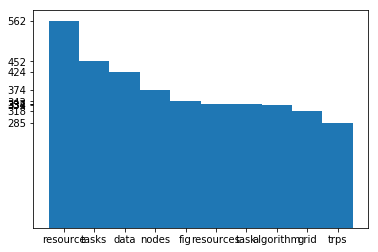

In [9]:
labels, ys = zip(*top)
xs = np.arange(len(labels)) 
width = 1

plt.bar(xs, ys, width, align='center')
plt.xticks(xs, labels) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(ys)
plt.show()
##plt.savefig('netscore.png')

## TEXT PROCESSING STEP 5:
### Stemming

In [10]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

stemmer = PorterStemmer()
stemmed = stem_tokens(thesis, stemmer)
count = Counter(stemmed)
top= count.most_common(10)
print(top)

[('resourc', 899), ('task', 787), ('algorithm', 490), ('node', 486), ('use', 439), ('data', 424), ('grid', 408), ('alloc', 376), ('fig', 343), ('comput', 328)]


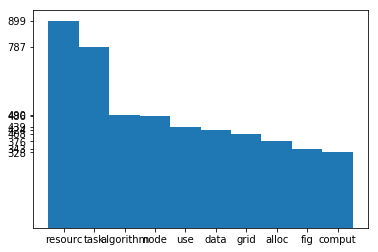

In [11]:
labels, ys = zip(*top)
xs = np.arange(len(labels)) 
width = 1

plt.bar(xs, ys, width, align='center')
plt.xticks(xs, labels) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(ys)
plt.show()

<img src="quiz.png",width=800,height=200>

## QUIZ
##### Which were useful results of Stemming on this data?
##### Which aspects of the results of Stemming do you not like on this data?

Import the necessary packages and functions

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
train_set = ["All mortals die.", "All men are mortals.", "All men die.", "Men Men Men"]


In [14]:
stop_words = stopwords.words('english')

In [15]:
transformer = TfidfVectorizer()
result= transformer.fit_transform(train_set)
print(result)

  (0, 0)	0.496816117483
  (0, 4)	0.613666744011
  (0, 2)	0.613666744011
  (1, 0)	0.408922062889
  (1, 4)	0.505100100533
  (1, 3)	0.408922062889
  (1, 1)	0.640655431107
  (2, 0)	0.532569523426
  (2, 2)	0.6578293133
  (2, 3)	0.532569523426
  (3, 3)	1.0


In [16]:
transformer.get_feature_names()
print(transformer.get_feature_names)

<bound method CountVectorizer.get_feature_names of TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)>


In [17]:
idf = transformer.idf_
print(idf)

[ 1.22314355  1.91629073  1.51082562  1.22314355  1.51082562]


## Part 3: Training a Binary Classifier for Unstructured Data

<img src="feedback.png",width=800,height=200>

In [18]:
terms_score  = zip(transformer.get_feature_names(), idf)
print(terms_score)

In [19]:
terms_score


In [20]:
# Natural Language Processing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
# Importing the dataset
dataset = pd.read_csv('customerFeedback.csv', delimiter = '\t', quoting = 3)

In [22]:
# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/student/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

In [24]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

/home/student/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [26]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [27]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [28]:
print(cm)

[[55 42]
 [12 91]]
